## Lab Cleaning categorical data

### 1. Import the necessary libraries if you are starting a new notebook.

In [86]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

### 2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [87]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [88]:
def discr_cont(df):
    discrete = []
    continuous = []
    for col in df.columns:
        if (df[col].dtype == np.float) or (df[col].dtype== np.int64):
            if len(df[col].value_counts()) > 202:
                continuous.append(col)
            else:
                discrete.append(col)
    return continuous, discrete

In [89]:
continuous, discrete = discr_cont(customer_df)

In [90]:
continuous_df = pd.DataFrame(customer_df[continuous])
continuous_df

,Customer Lifetime Value,Income,Total Claim Amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [91]:
discrete_df = pd.DataFrame(customer_df[discrete])
discrete_df

,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


### 3. Plot a correlation matrix, what can you see?

In [92]:
continuous_df.corr()

,Customer Lifetime Value,Income,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.226451
Income,0.024366,1.000000,-0.355254
Total Claim Amount,0.226451,-0.355254,1.000000


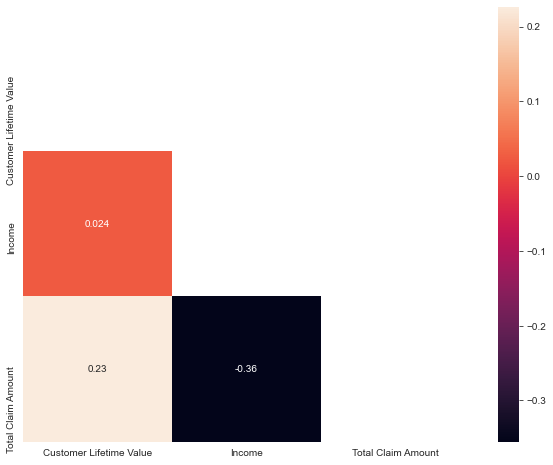

In [93]:
mask = np.zeros_like(continuous_df.corr()) 
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(continuous_df.corr(), mask=mask, annot=True)
plt.show() 

In [94]:
discrete_df.corr()

,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
Monthly Premium Auto,1.000000,0.005026,0.020257,-0.013122,-0.011233
Months Since Last Claim,0.005026,1.000000,-0.042959,0.005354,0.009136
Months Since Policy Inception,0.020257,-0.042959,1.000000,-0.001158,-0.013333
Number of Open Complaints,-0.013122,0.005354,-0.001158,1.000000,0.001498
Number of Policies,-0.011233,0.009136,-0.013333,0.001498,1.000000


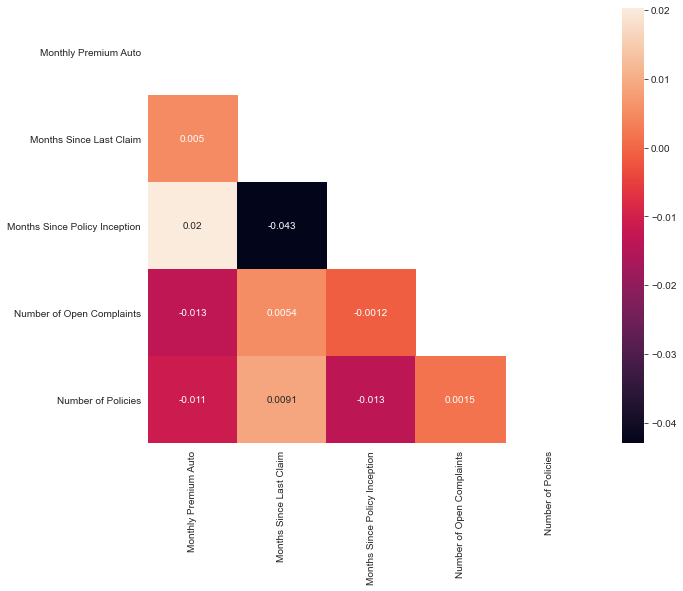

In [95]:
mask = np.zeros_like(discrete_df.corr()) 
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(discrete_df.corr(), mask=mask, annot=True)
plt.show() 

### 4. Create a function to plot every discrete variables. Do the same with continuous variables
(be careful, you may change the plot type to another one better suited for continuous data).

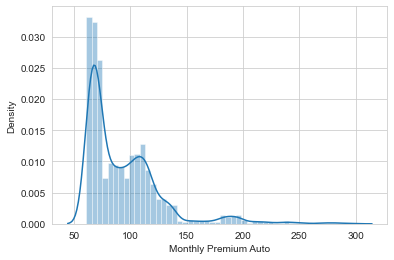

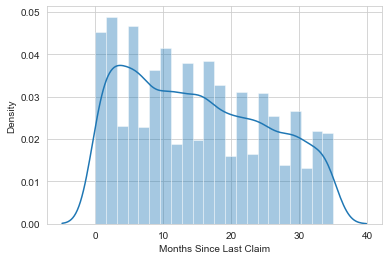

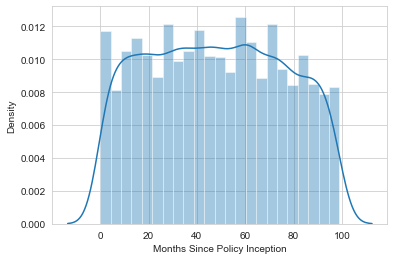

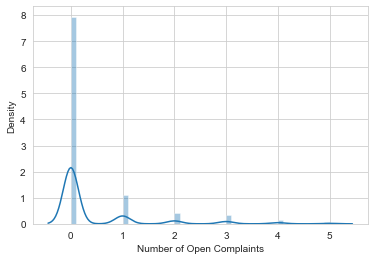

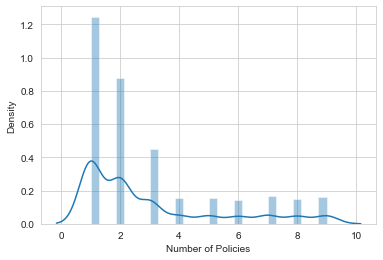

In [96]:
def plt_discrete(x):
    for x in discrete_df.columns:
        sns.distplot(discrete_df[x])
        plt.show()

plt_discrete(x)

--- Customer Lifetime Value ---


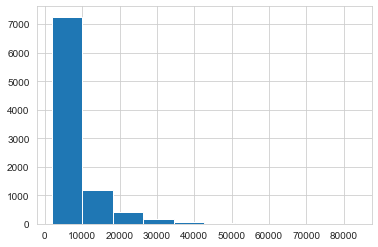

--- Income ---


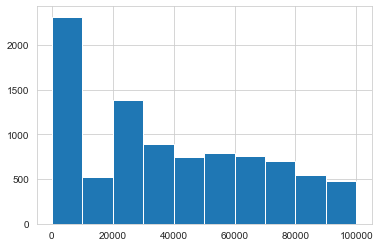

--- Total Claim Amount ---


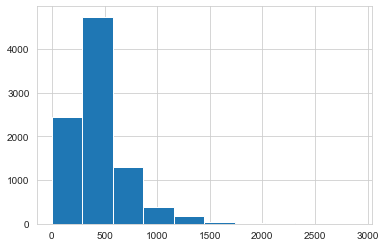

In [97]:
def plt_continuous(x):
    for x in continuous_df.columns:
        continuous_df[x].hist()
        print('---',x,'---')
        plt.show()

plt_continuous(x)

### 5. What can you see in the plots?

Monthly Premium Auto, Number of Open Complaints and Number of Policies have a long tail to the right
Customer Lifetime Value and Income has a lot of 0 values

### 6. Look for outliers in the continuous variables we have found. 
Hint: There was a good plot to do that.

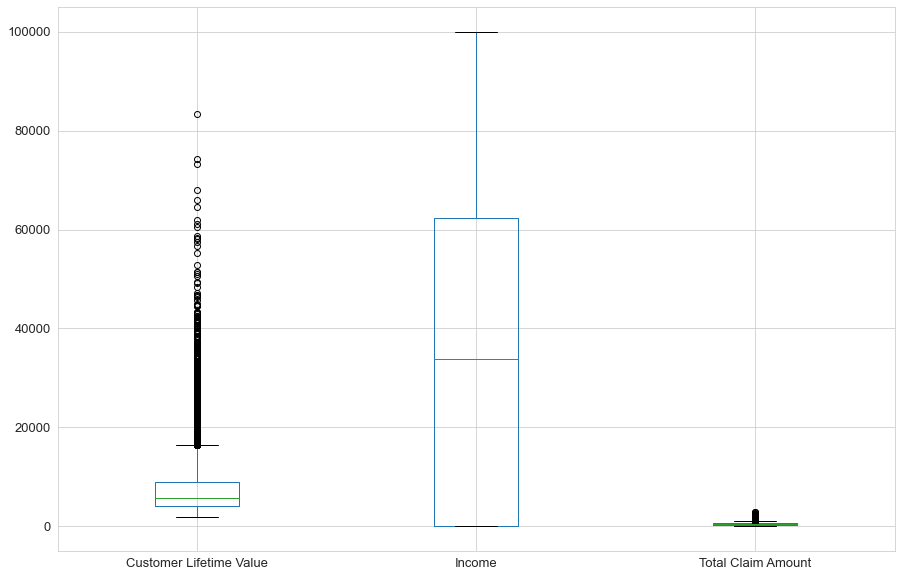

In [98]:
continuous_df.boxplot(fontsize=13,figsize=(15, 10))
plt.show()

### 7. Have you found outliers? If you have, what should we do with them?

Compute the IQR (interquartillic range)

In [99]:
def compute_iqr(x):
    for i in x:
        iqr = np.percentile(x[i],75) - np.percentile(x[i],25)
        upper_limit = np.percentile(x[i],75) + 1.5*iqr
        print("--",i,"--")
        print("The upper wisker is at: %4.2f" % upper_limit)
        outliers = x[x[i] > upper_limit].index.tolist() # get the row numbers of outliers
        print("The number of points outside the upper wisker is: ",len(outliers), "\n") 

In [100]:
compute_iqr(continuous_df)

-- Customer Lifetime Value --
The upper wisker is at: 16414.04
The number of points outside the upper wisker is:  817 

-- Income --
The upper wisker is at: 155800.00
The number of points outside the upper wisker is:  0 

-- Total Claim Amount --
The upper wisker is at: 960.40
The number of points outside the upper wisker is:  453 



### 8. Check nan values per column.

In [101]:
continuous_df.isna().sum()

Customer Lifetime Value    0
Income                     0
Total Claim Amount         0
dtype: int64

In [102]:
discrete_df.isna().sum()

Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
dtype: int64

### 9. Define a function that differentiate between continuous and discrete variables. 
Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [103]:
def discr_cont(df):
    discrete = []
    continuous = []
    for col in df.columns:
        if (df[col].dtype == np.float) or (df[col].dtype== np.int64):
            if len(df[col].value_counts()) > 202:
                continuous.append(col)
            else:
                discrete.append(col)
    return continuous, discrete

In [104]:
continuous, discrete = discr_cont(customer_df)

In [105]:
print('DISCRETE', discrete)
print()
print('CONTINUOUS', continuous)

DISCRETE ['Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies']

CONTINUOUS ['Customer Lifetime Value', 'Income', 'Total Claim Amount']


### 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it.
Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [106]:
df_cat = customer_df.select_dtypes(include = np.object)
df_cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [108]:
cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower())
customer_df.columns = cols

In [109]:
customer_df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [110]:
cols = []
for x in customer_df.columns:
    x = x.replace(' ', '_')
    cols.append(x) 
customer_df.columns = cols

In [111]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [112]:
customer_df.effective_to_date = pd.to_datetime(customer_df.effective_to_date, errors='coerce')
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [113]:
customer_df = customer_df.rename(columns={'employmentstatus': 'employment_status'})
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [114]:
#customer_df['state'].value_counts()
#customer_df['customer_lifetime_value'].value_counts()
#customer_df['coverage'].value_counts()
#customer_df['education'].value_counts()
#customer_df['employment_status'].value_counts()
#customer_df['gender'].value_counts()
#customer_df['location_code'].value_counts()
customer_df['marital_status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

### 9. Get categorical features

In [115]:
df_cat = customer_df.select_dtypes(include = np.object)
df_cat.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 10. What should we do with the customer_id column?

I would drop the column customer_id, since this is not useful data.